# Homework 2

## 1. Importing boston dataset and necessary libraries

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X,y =load_boston(return_X_y=True)

df = pd.DataFrame(X,columns = load_boston().feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


- We are importing dataset from sklearn library. After we create a dataframe from dataset by using pandas library.

## 2. Explore and analyze raw data

### 2.1. General information about dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


- In boston house-prices dataset, there are 506 samples and 13 features. 
- This dataset is about a regression problem.
- All 13 features are of _continuous_ variable type (flaot64) and all values are _positive_. 
- 13 attribute information (in order):
    - **CRIM:** Per capita crime rate by town
    - **ZN:** Proportion of residential land zoned for lots over 25,000 sq. ft
    - **INDUS:** Proportion of non-retail business acres per town
    - **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - **NOX:** Nitric oxide concentration (parts per 10 million)
    - **RM:** Average number of rooms per dwelling
    - **AGE:** Proportion of owner-occupied units built prior to 1940
    - **DIS:** Weighted distances to five Boston employment centers
    - **RAD:** Index of accessibility to radial highways
    - **TAX:** Full-value property tax rate per \$10,000
    - **PTRATIO:** Pupil-teacher ratio by town
    - **B:** 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
    - **LSTAT:** Percentage of lower status of the population
- We have 1 target variable and it is _continious_ variable as well. This attribute gets value between 5 and 50.
    - **MEDV:** Median value of owner-occupied homes in \$1000s
   

In dataframe as you see above, target variable is missing, therfore I will create a new column named **MEDV** for target variable in dataframe.

In [4]:
df['MEDV'] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 2.2. Distribution of target variable

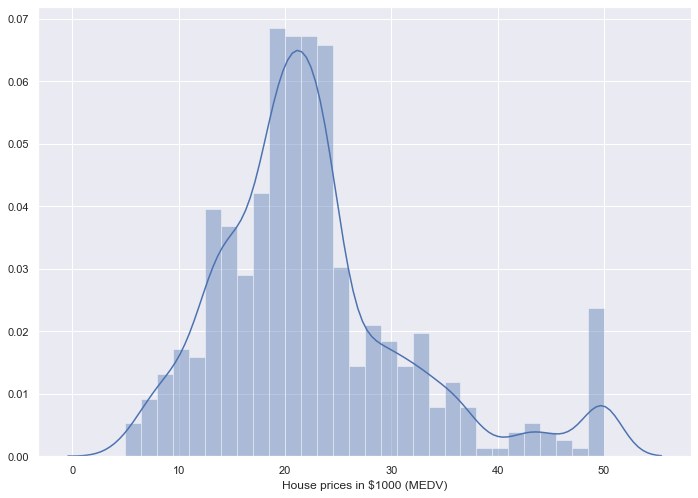

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.xlabel("House prices in $1000 (MEDV)")
plt.show()

We can see from the plot above that the values of **MEDV** are distributed normally with few outliers. Most of the house are around 20–24 range (in \$1000 scale).

### 2.3. Correlation matrix

Now, we create a correlation matrix that measures the linear relationships between the variables. For this purpose, we use `corr` function of pandas dataframe library.

The correlation coefficient ranges from -1 to 1. If the value is close to ***1***, it means that there is a ***strong positive*** correlation between the two variables. When it is close to ***-1***, the variables have a ***strong negative*** correlation.

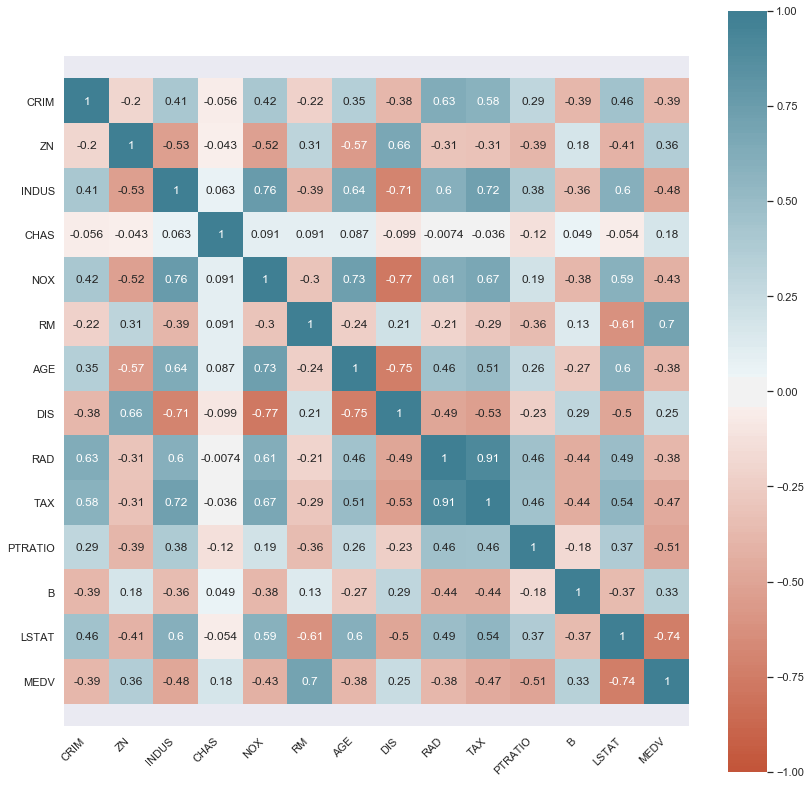

In [6]:
# Correlation of the features
import seaborn as sns
corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

**Analysis of Heatmap**

**1. Relationships of IV to DV _(Relevancy Check)_**

   - Target variable(DV) **MEDV** has a high positive correlation of ***0.7*** with **RM**.

   - Target variable(DV) **MEDV** has a high negative correlation of ***-0.74*** with **LSTAT**.
  
NOTE: RM and LSTAT are important features for us.

NOTE: These relationships are shown in the scatter plots below.

**2. Relationships of IV to IV _(Multicollinearity Check)_**

   - **TAX** and **RAD** have a strong positive correlation of ***0.91***

   - **NOX** and **INDUS** have a high positive correlation of ***0.76***

   - **DIS** and **NOX** have a high negative correlation of ***-0.77***
   
   - **DIS** and **AGE** have a high negative correlation of ***-0.75***
   
   - **INDUS** and **AGE** have a high positive correlation of ***0.64***

> IV: Independent variable
> 
> DV: Dependent variable

In [7]:
# # Import library for VIF
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# def calc_vif(X):

#     # Calculating VIF
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#     return(vif)

In [8]:
# X = df.iloc[:,:-1]
# calc_vif(X)

In [9]:
# XX = df.drop(['RAD'],axis=1)
# calc_vif(XX)

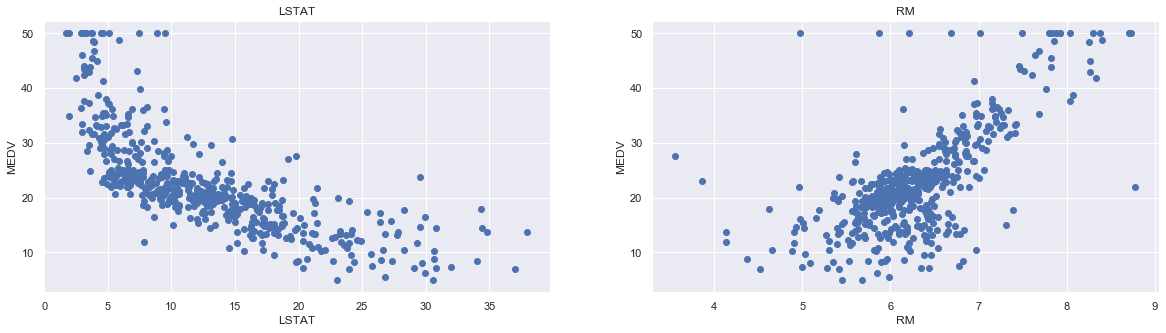

In [10]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    _x = df[col]
    _y = target
    plt.scatter(_x, _y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

- The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

- The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.

## 3. Data preprocessing

### 3.1. Checking missing values

In [11]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no missing values for any feature.

### 3.2. Dropping correlated features

In [12]:
# columns = ['NOX', 'AGE', 'DIS', 'RAD', 'CHAS', 'B', 'ZN', 'CRIM']
columns = ['AGE','INDUS']
df_dropped = df.drop(columns=columns) # not scaled, dropped features

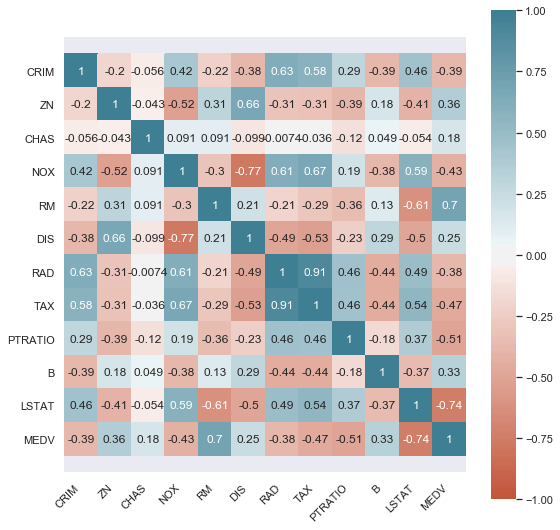

In [13]:
# Correlation of the features
import seaborn as sns
corr = df_dropped.corr()

plt.figure(figsize=(9, 9))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

### 3.3. Oulier detection

In [14]:
# Outlier detection with Z-Score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_dropped))

In [15]:
len(np.where(z > 3)[0])

100

In [16]:
outliers = list(set(np.where(z > 3)[0]))
df_dropped_nooutliers = df_dropped.drop(outliers,axis = 0).reset_index(drop=True) # dropped corr features, dropped outliers, not scaled
df_dropped_nooutliers

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
410,0.06263,0.0,0.0,0.573,6.593,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
411,0.04527,0.0,0.0,0.573,6.120,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
412,0.06076,0.0,0.0,0.573,6.976,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
413,0.10959,0.0,0.0,0.573,6.794,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### 3.4. Feature scaling

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Dropped corr features, with outliers, not scaled => df_dropped
X_dropped = df_dropped.iloc[:,:-1] # features
y_dropped = df_dropped['MEDV'] # target variable

# Dropped corr features, with outliers, scaled => df_dropped_scaled
X_dropped_scaled = StandardScaler().fit_transform(X_dropped)
df_dropped_scaled = pd.DataFrame(X_dropped_scaled,columns = X_dropped.columns)
df_dropped_scaled['MEDV'] = y_dropped

# Dropped corr features, dropped outliers, not scaled => df_dropped_nooutliers
X_dropped_nooutliers = df_dropped_nooutliers.iloc[:,:-1] # features
y_dropped_nooutliers = df_dropped_nooutliers['MEDV'] # target variable

# Dropped corr features, dropped outliers, scaled => => df_dropped_nooutliers_scaled
X_dropped_nooutliers_scaled = StandardScaler().fit_transform(X_dropped_nooutliers)
df_dropped_nooutliers_scaled = pd.DataFrame(X_dropped_nooutliers_scaled,columns = X_dropped_nooutliers.columns)
df_dropped_nooutliers_scaled['MEDV'] = y_dropped_nooutliers

We have 5 different datasets anymore. These:

1. `df` => original dataset (without any operation)
2. `df_dropped` => Dropped correlated features, with outliers, not scaled
3. `df_dropped_scaled` => Dropped correlated features, with outliers, scaled
4. `df_dropped_nooutliers` => Dropped correlated features, dropped outliers, not scaled
5. `df_dropped_nooutliers_scaled` => Dropped correlated features, dropped outliers, scaled

**NOTE:** If you want to see general information about these datasets, please uncomment code cells below and run them...

In [18]:
# df.head(2)

In [19]:
# df_dropped.head(2)

In [20]:
# df_dropped_scaled.head(2)

In [21]:
# df_dropped_nooutliers.head(2)

In [22]:
# df_dropped_nooutliers_scaled.head(2)

## 4. Creating Regression Models

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def linear_metrics(X,y,model):
    y_pred = model.predict(X)
    r2 = model.score(X, y)
    adj_r2 = (1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1))
    mse = mean_squared_error(y, y_pred)
    rmse = (np.sqrt(mse))
    mae = mean_absolute_error(y, y_pred)
    rmae = (np.sqrt(mae))
    print('r2: {}'.format(r2))
    print('adj_r2: {}'.format(adj_r2))
#     print('mse: {}'.format(mse))
#     print('rmse: {}'.format(rmse))
#     print('mae: {}'.format(mae))
#     print('rmae: {}'.format(rmae))
    print('-----------------------------------------')

### Model 1: Dropped correlated features, with outliers, not scaled

In [24]:
# model 1: Dropped correlated features, with outliers, not scaled
X_1 = df_dropped.iloc[:,:-1] # features
y_1 = df_dropped['MEDV'] # target variable

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size = 0.3, random_state = 42)

model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

print('Linear metrics of train set for Model 1')
linear_metrics(X_train1, y_train1, model1)

print('Linear metrics of test set for Model 1')
linear_metrics(X_test1, y_test1, model1)

Linear metrics of train set for Model 1
r2: 0.7428288884259309
adj_r2: 0.7345573029659462
-----------------------------------------
Linear metrics of test set for Model 1
r2: 0.7149039348907369
adj_r2: 0.6925035297750091
-----------------------------------------


### Model 2: Dropped correlated features, with outliers, scaled

In [25]:
# model 2: Dropped correlated features, with outliers, scaled
X_2 = df_dropped_scaled.iloc[:,:-1] # features
y_2 = df_dropped_scaled['MEDV'] # target variable

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size = 0.3, random_state = 42)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

print('Linear metrics of train set for Model 2')
linear_metrics(X_train2, y_train2, model2)

print('Linear metrics of test set for Model 2')
linear_metrics(X_test2, y_test2, model2)

Linear metrics of train set for Model 2
r2: 0.7428288884259309
adj_r2: 0.7345573029659462
-----------------------------------------
Linear metrics of test set for Model 2
r2: 0.7149039348907372
adj_r2: 0.6925035297750095
-----------------------------------------


### Model 3: Dropped correlated features, dropped outliers, not scaled

In [26]:
# model 3: Dropped correlated features, dropped outliers, not scaled
X_3 = df_dropped_nooutliers.iloc[:,:-1] # features
y_3 = df_dropped_nooutliers['MEDV'] # target variable

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y_3, test_size = 0.3, random_state = 42)

model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

print('Linear metrics of train set for Model 3')
linear_metrics(X_train3, y_train3, model3)

print('Linear metrics of test set for Model 3')
linear_metrics(X_test3, y_test3, model3)

Linear metrics of train set for Model 3
r2: 0.7562435684737906
adj_r2: 0.7465985298162787
-----------------------------------------
Linear metrics of test set for Model 3
r2: 0.6779025168382895
adj_r2: 0.6465478945836097
-----------------------------------------


### Model 4: Dropped correlated features, dropped outliers, scaled

In [27]:
# model 4: Dropped correlated features, dropped outliers, scaled
X_4 = df_dropped_nooutliers_scaled.iloc[:,:-1] # features
y_4 = df_dropped_nooutliers_scaled['MEDV'] # target variable

X_train4, X_test4, y_train4, y_test4 = train_test_split(X_4, y_4, test_size = 0.3, random_state = 42)

model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

print('Linear metrics of train set for Model 4')
linear_metrics(X_train4, y_train4, model4)

print('Linear metrics of test set for Model 4')
linear_metrics(X_test4, y_test4, model4)

Linear metrics of train set for Model 4
r2: 0.7562435684737906
adj_r2: 0.7465985298162787
-----------------------------------------
Linear metrics of test set for Model 4
r2: 0.6779025168382922
adj_r2: 0.6465478945836126
-----------------------------------------


### Model 5: Dropped correlated features, dropped outliers, scaled, regularized ridre regression(alpha=0.01)

In [28]:
X_5 = df_dropped_nooutliers_scaled.iloc[:,:-1] # features
y_5 = df_dropped_nooutliers_scaled['MEDV'] # target variable

X_train5, X_test5, y_train5, y_test5 = train_test_split(X_5, y_5, test_size = 0.3, random_state = 42)

#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff
model5 = Ridge(alpha = 0.01)
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

print('Linear metrics of train set for Model 5')
linear_metrics(X_train5, y_train5, model5)

print('Linear metrics of test set for Model 5')
linear_metrics(X_test5, y_test5, model5)

Linear metrics of train set for Model 5
r2: 0.7562435669300889
adj_r2: 0.7465985282114953
-----------------------------------------
Linear metrics of test set for Model 5
r2: 0.6778994407650272
adj_r2: 0.6465445190695873
-----------------------------------------


### Model 6: Dropped correlated features, dropped outliers, scaled, regularized ridre regression(alpha=0.1)

In [29]:
X_6 = df_dropped_nooutliers_scaled.iloc[:,:-1] # features
y_6 = df_dropped_nooutliers_scaled['MEDV'] # target variable

X_train6, X_test6, y_train6, y_test6 = train_test_split(X_6, y_6, test_size = 0.3, random_state = 42)

#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff
model6 = Ridge(alpha = 0.1)
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

print('Linear metrics of train set for Model 6')
linear_metrics(X_train6, y_train6, model6)

print('Linear metrics of test set for Model 6')
linear_metrics(X_test6, y_test6, model6)

Linear metrics of train set for Model 6
r2: 0.7562434148937173
adj_r2: 0.746598370159296
-----------------------------------------
Linear metrics of test set for Model 6
r2: 0.6778718503836704
adj_r2: 0.6465142428988949
-----------------------------------------


### Model 7: Dropped correlated features, dropped outliers, scaled, regularized ridre regression(alpha=0.5)

In [30]:
X_7 = df_dropped_nooutliers_scaled.iloc[:,:-1] # features
y_7 = df_dropped_nooutliers_scaled['MEDV'] # target variable

X_train7, X_test7, y_train7, y_test7 = train_test_split(X_7, y_7, test_size = 0.3, random_state = 42)

#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff
model7 = Ridge(alpha = 0.5)
model7.fit(X_train7, y_train7)
y_pred7 = model7.predict(X_test7)

print('Linear metrics of train set for Model 7')
linear_metrics(X_train7, y_train7, model7)

print('Linear metrics of test set for Model 7')
linear_metrics(X_test7, y_test7, model7)

Linear metrics of train set for Model 7
r2: 0.7562398143298288
adj_r2: 0.7465946271270523
-----------------------------------------
Linear metrics of test set for Model 7
r2: 0.6777512594512691
adj_r2: 0.6463819130261714
-----------------------------------------


### Model 8: Dropped correlated features, dropped outliers, scaled, regularized ridre regression(alpha=1.0)

In [31]:
X_8 = df_dropped_nooutliers_scaled.iloc[:,:-1] # features
y_8 = df_dropped_nooutliers_scaled['MEDV'] # target variable

X_train8, X_test8, y_train8, y_test8 = train_test_split(X_8, y_8, test_size = 0.3, random_state = 42)

#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff
model8 = Ridge(alpha = 1.0)
model8.fit(X_train8, y_train8)
y_pred8 = model8.predict(X_test8)

print('Linear metrics of train set for Model 8')
linear_metrics(X_train8, y_train8, model8)

print('Linear metrics of test set for Model 8')
linear_metrics(X_test8, y_test8, model8)

Linear metrics of train set for Model 8
r2: 0.7562289575294938
adj_r2: 0.7465833407410924
-----------------------------------------
Linear metrics of test set for Model 8
r2: 0.6776050934584955
adj_r2: 0.6462215184854287
-----------------------------------------


### Model 9: Dropped correlated features, dropped outliers, scaled, regularized ridre regression(alpha=2.0)

In [32]:
X_9 = df_dropped_nooutliers_scaled.iloc[:,:-1] # features
y_9 = df_dropped_nooutliers_scaled['MEDV'] # target variable

X_train9, X_test9, y_train9, y_test9 = train_test_split(X_9, y_9, test_size = 0.3, random_state = 42)

#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff
model9 = Ridge(alpha = 2.0)
model9.fit(X_train9, y_train9)
y_pred9 = model9.predict(X_test9)

print('Linear metrics of train set for Model 9')
linear_metrics(X_train9, y_train9, model9)

print('Linear metrics of test set for Model 9')
linear_metrics(X_test9, y_test9, model9)

Linear metrics of train set for Model 9
r2: 0.756188114497204
adj_r2: 0.746540881617597
-----------------------------------------
Linear metrics of test set for Model 9
r2: 0.677327367231225
adj_r2: 0.6459167569616981
-----------------------------------------


### Model 10: Dropped correlated features, dropped outliers, scaled, regularized lasso regression(alpha=0.01)

In [33]:
X_10 = df_dropped_nooutliers_scaled.iloc[:,:-1] # features
y_10 = df_dropped_nooutliers_scaled['MEDV'] # target variable

X_train10, X_test10, y_train10, y_test10 = train_test_split(X_10, y_10, test_size = 0.3, random_state = 42)

#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff
model10 = Lasso(alpha = 0.01)
model10.fit(X_train10, y_train10)
y_pred10 = model10.predict(X_test10)

print('Linear metrics of train set for Model 10')
linear_metrics(X_train10, y_train10, model10)

print('Linear metrics of test set for Model 10')
linear_metrics(X_test10, y_test10, model10)

Linear metrics of train set for Model 10
r2: 0.7561841457682322
adj_r2: 0.7465367558525868
-----------------------------------------
Linear metrics of test set for Model 10
r2: 0.6766141271327922
adj_r2: 0.6451340864112056
-----------------------------------------


### Model 11: Dropped correlated features, dropped outliers, scaled, regularized lasso regression(alpha=0.1)

In [34]:
X_11 = df_dropped_nooutliers_scaled.iloc[:,:-1] # features
y_11 = df_dropped_nooutliers_scaled['MEDV'] # target variable

X_train11, X_test11, y_train11, y_test11 = train_test_split(X_11, y_11, test_size = 0.3, random_state = 42)

#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff
model11 = Lasso(alpha = 0.1)
model11.fit(X_train11, y_train11)
y_pred11 = model11.predict(X_test11)

print('Linear metrics of train set for Model 11')
linear_metrics(X_train11, y_train11, model11)

print('Linear metrics of test set for Model 11')
linear_metrics(X_test11, y_test11, model10)

Linear metrics of train set for Model 11
r2: 0.7506779003839736
adj_r2: 0.7408126374495265
-----------------------------------------
Linear metrics of test set for Model 11
r2: 0.6766141271327922
adj_r2: 0.6451340864112056
-----------------------------------------


### Model 12: Dropped correlated features, dropped outliers, scaled, regularized lasso regression(alpha=0.5)

In [35]:
X_12 = df_dropped_nooutliers_scaled.iloc[:,:-1] # features
y_12 = df_dropped_nooutliers_scaled['MEDV'] # target variable

X_train12, X_test12, y_train12, y_test12 = train_test_split(X_12, y_12, test_size = 0.3, random_state = 42)

#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff
model12 = Lasso(alpha = 0.5)
model12.fit(X_train12, y_train12)
y_pred12 = model12.predict(X_test12)

print('Linear metrics of train set for Model 12')
linear_metrics(X_train12, y_train12, model12)

print('Linear metrics of test set for Model 12')
linear_metrics(X_test12, y_test12, model12)

Linear metrics of train set for Model 12
r2: 0.7245098139932024
adj_r2: 0.7136091231799837
-----------------------------------------
Linear metrics of test set for Model 12
r2: 0.6455523827504575
adj_r2: 0.6110486323987321
-----------------------------------------


### Model 13: Dropped correlated features, dropped outliers, scaled, regularized lasso regression(alpha=1.0)

In [36]:
X_13 = df_dropped_nooutliers_scaled.iloc[:,:-1] # features
y_13 = df_dropped_nooutliers_scaled['MEDV'] # target variable

X_train13, X_test13, y_train13, y_test13 = train_test_split(X_13, y_13, test_size = 0.3, random_state = 42)

#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff
model13 = Lasso(alpha = 1.0)
model13.fit(X_train13, y_train13)
y_pred13 = model13.predict(X_test13)

print('Linear metrics of train set for Model 13')
linear_metrics(X_train13, y_train13, model13)

print('Linear metrics of test set for Model 13')
linear_metrics(X_test13, y_test13, model13)

Linear metrics of train set for Model 13
r2: 0.7027683749746343
adj_r2: 0.691007411394494
-----------------------------------------
Linear metrics of test set for Model 13
r2: 0.6405544439918718
adj_r2: 0.6055641686282487
-----------------------------------------


### Model 14: Dropped correlated features, dropped outliers, scaled, regularized lasso regression(alpha=2.0)

In [37]:
X_14 = df_dropped_nooutliers_scaled.iloc[:,:-1] # features
y_14 = df_dropped_nooutliers_scaled['MEDV'] # target variable

X_train14, X_test14, y_train14, y_test14 = train_test_split(X_14, y_14, test_size = 0.3, random_state = 42)

#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff
model14 = Lasso(alpha = 2.0)
model14.fit(X_train14, y_train14)
y_pred14 = model13.predict(X_test14)

print('Linear metrics of train set for Model 14')
linear_metrics(X_train14, y_train14, model14)

print('Linear metrics of test set for Model 14')
linear_metrics(X_test14, y_test14, model14)

Linear metrics of train set for Model 14
r2: 0.6296979785529495
adj_r2: 0.6150457402942533
-----------------------------------------
Linear metrics of test set for Model 14
r2: 0.593321938951359
adj_r2: 0.5537338091147657
-----------------------------------------


## 5. Evaluate Models

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

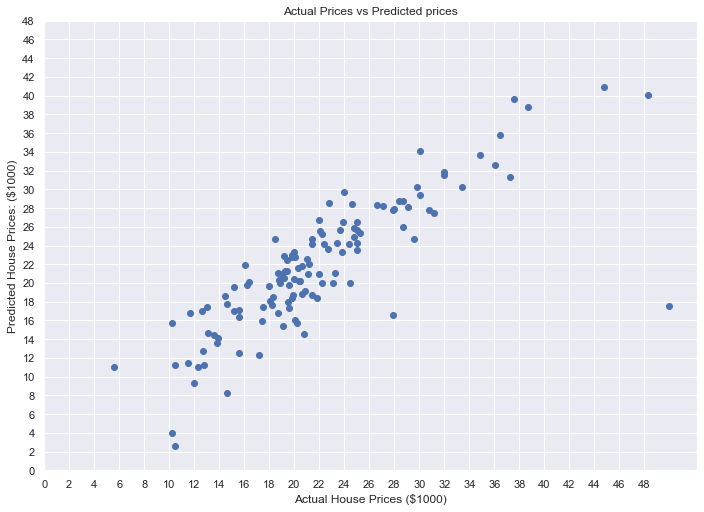

In [38]:
plt.scatter(y_test7, y_pred7)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.xticks(range(0, int(max(y_test7)),2))
plt.yticks(range(0, int(max(y_test7)),2))
plt.title("Actual Prices vs Predicted prices")

In [39]:
def adj_r2 (X,y,model):
    r2 = model.score(X,y)
    return(1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1))

#### R Squared and Adjuster R squared for train set of all models

In [40]:
r2_all_train = [
    model1.score(X_train1,y_train1),model2.score(X_train2,y_train2),model3.score(X_train3,y_train3),
    model4.score(X_train4,y_train4),model5.score(X_train5,y_train5),model6.score(X_train6,y_train6),
    model7.score(X_train7,y_train7),model8.score(X_train8,y_train8),model9.score(X_train9,y_train9),
    model10.score(X_train10,y_train10),model11.score(X_train11,y_train11),model12.score(X_train12,y_train12),
    model13.score(X_train13,y_train13),model14.score(X_train14,y_train14)]

adj_r2_all_train = [
    adj_r2(X_train1,y_train1,model1),adj_r2(X_train2,y_train2,model2),adj_r2(X_train3,y_train3,model3),
    adj_r2(X_train4,y_train4,model4),adj_r2(X_train5,y_train5,model5),adj_r2(X_train6,y_train6,model6),
    adj_r2(X_train7,y_train7,model7),adj_r2(X_train8,y_train8,model8),adj_r2(X_train9,y_train9,model9),
    adj_r2(X_train10,y_train10,model10),adj_r2(X_train11,y_train11,model11),adj_r2(X_train12,y_train12,model12),
    adj_r2(X_train13,y_train13,model13),adj_r2(X_train14,y_train14,model14)
]

#### R Squared and Adjuster R squared for test set of all models

In [41]:
r2_all_test = [model1.score(X_test1,y_test1),model2.score(X_test2,y_test2),model3.score(X_test3,y_test3),
          model4.score(X_test4,y_test4),model5.score(X_test5,y_test5),model6.score(X_test6,y_test6),
          model7.score(X_test7,y_test7),model8.score(X_test8,y_test8),model9.score(X_test9,y_test9),
          model10.score(X_test10,y_test10),model11.score(X_test11,y_test11),model12.score(X_test12,y_test12),
          model13.score(X_test13,y_test13),model14.score(X_test14,y_test14)]

adj_r2_all_test = [
    adj_r2(X_test1,y_test1,model1),adj_r2(X_test2,y_test2,model2),adj_r2(X_test3,y_test3,model3),
    adj_r2(X_test4,y_test4,model4),adj_r2(X_test5,y_test5,model5),adj_r2(X_test6,y_test6,model6),
    adj_r2(X_test7,y_test7,model7),adj_r2(X_test8,y_test8,model8),adj_r2(X_test9,y_test9,model9),
    adj_r2(X_test10,y_test10,model10),adj_r2(X_test11,y_test11,model11),adj_r2(X_test12,y_test12,model12),
    adj_r2(X_test13,y_test13,model13),adj_r2(X_test14,y_test14,model14)
]

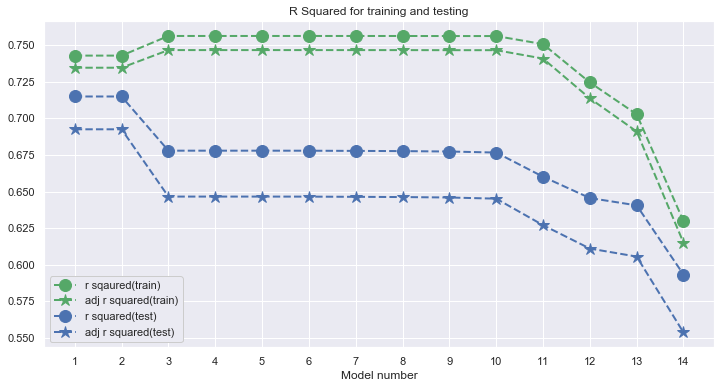

In [42]:
models = list(range(1, 15))
plt.figure(figsize=(12,6))
# plt.plot(models,r2_all_train, 'go--', linewidth=2, markersize=12)
plt.plot(models,r2_all_train, 'go--', linewidth=2, markersize=12, label='r sqaured(train)')
plt.plot(models,adj_r2_all_train, 'g*--', linewidth=2, markersize=12, label='adj r squared(train)')
plt.plot(models,r2_all_test, 'bo--', linewidth=2, markersize=12, label='r squared(test)')
plt.plot(models,adj_r2_all_test, 'b*--', linewidth=2, markersize=12, label='adj r squared(test)')
plt.title("R Squared for training and testing")
plt.xlabel("Model number")
plt.xticks(models)
plt.legend(framealpha=1, frameon=True);
plt.show()